In [31]:
import pickle

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree
#from scipy.spatial.distance import pdist
#from scipy.cluster.hierarchy import fcluster

from matplotlib import pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

import plotly as py
print (py.__version__) # requires version >= 1.9.0\n",
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

#TODO - redo and make sure each matrix is 593x593
# PCA 
#divide each matrix by average value
#try to get a good ordering

%run se.py

3.4.0


In [2]:
engine = create_engine('mysql://%s:%s@%s:3306/%s' % (seuser, sepass, sehost, sedb)) 


In [3]:
# collect people with a view to not tracking some
sqlstr = "select source subsource_name, count(*) c from tweep_edge group by source order by source;"
subsources1 = pd.read_sql(sqlstr, engine)
sqlstr = "select target subsource_name, count(*) c from tweep_edge group by target order by target;"
subsources2 = pd.read_sql(sqlstr, engine)
subsources_df = subsources1.merge(subsources2, how='outer', on='subsource_name')
subsources_df

,subsource_name,c_x,c_y
0,50Pips,36.0,16
1,AaronLucchetti,143.0,102
2,aarontask,215.0,105
3,abnormalreturns,112.0,139
4,acrossthecurve,121.0,54
5,ActivistShorts,48.0,39
6,activiststocks,161.0,38
7,AdamPosen,47.0,160
8,alansmurray,145.0,136
9,AlanTonelson,110.0,54


In [4]:
subsources_df.fillna(0, inplace=True)
# follows in panel plus followers in panel
subsources_df['total'] = subsources_df['c_x'] + subsources_df['c_y']
subsources_df.loc[subsources_df["c_y"]< 55].sort_values('c_y')["subsource_name"]

466       Wexboy_Value
0               50Pips
18          AlphaClone
171        hedge_funds
219     JournalofValue
168      HardcoreValue
436      TheBasisPoint
431     TALENTEDBLONDE
368       rationalwalk
266      MaglanCapital
303          MissTrade
438    TheIntuitInvest
44         bengoldacre
468     WillauerProsky
430          TabbFORUM
356     pointsnfigures
211        JohnLothian
342       OpenOutcrier
311          MOstwald1
403           sellputs
73         chicagosean
106     DividendMaster
459      UpdatedPriors
490        Dvolatility
6       activiststocks
262         LWinthorpe
5       ActivistShorts
268            maoxian
267       MalcolmMoore
343            panphil
            ...       
140       fiatcurrency
435      TheArmoTrader
392           SamAntar
461           vitaliyk
39     bauhiniacapital
180           inafried
448       ToddSullivan
230         Kantrowitz
105           dinabass
316       nancefinance
365              rafat
400     SconsetCapital
85         

In [5]:
sqlstr = """select subsource_id, subsource_name,
avg(`0`) t_0,
avg(`1`) t_1,
avg(`2`) t_2,
avg(`3`) t_3,
avg(`4`) t_4,
avg(`5`) t_5,
avg(`6`) t_6,
avg(`7`) t_7,
avg(`8`) t_8,
avg(`9`) t_9,
avg(`10`) t_10,
avg(`11`) t_11,
avg(`12`) t_12,
avg(`13`) t_13,
avg(`14`) t_14,
avg(`15`) t_15,
avg(`16`) t_16,
avg(`17`) t_17,
avg(`18`) t_18,
avg(`19`) t_19,
avg(`20`) t_20,
avg(`21`) t_21,
avg(`22`) t_22,
avg(`23`) t_23,
avg(`24`) t_24,
avg(`25`) t_25,
avg(`26`) t_26,
avg(`27`) t_27,
avg(`28`) t_28,
avg(`29`) t_29,
avg(`30`) t_30,
avg(`31`) t_31,
avg(`32`) t_32,
avg(`33`) t_33,
avg(`34`) t_34,
avg(`35`) t_35,
avg(`36`) t_36,
avg(`37`) t_37,
avg(`38`) t_38,
avg(`39`) t_39,
avg(`40`) t_40,
avg(`41`) t_41,
avg(`42`) t_42,
avg(`43`) t_43,
avg(`44`) t_44,
avg(`45`) t_45,
avg(`46`) t_46,
avg(`47`) t_47,
avg(`48`) t_48,
avg(`49`) t_49,
avg(`50`) t_50,
avg(`51`) t_51,
avg(`52`) t_52,
avg(`53`) t_53,
avg(`54`) t_54,
avg(`55`) t_55,
avg(`56`) t_56,
avg(`57`) t_57,
avg(`58`) t_58,
avg(`59`) t_59,
avg(`60`) t_60,
avg(`61`) t_61,
avg(`62`) t_62,
avg(`63`) t_63,
avg(`64`) t_64,
avg(`65`) t_65,
avg(`66`) t_66,
avg(`67`) t_67,
avg(`68`) t_68,
avg(`69`) t_69,
avg(`70`) t_70,
avg(`71`) t_71,
avg(`72`) t_72,
avg(`73`) t_73,
avg(`74`) t_74,
avg(`75`) t_75,
avg(`76`) t_76,
avg(`77`) t_77,
avg(`78`) t_78,
avg(`79`) t_79
from topics_byid join rawurl on topics_byid.id = rawurl.actualurl_id 
join rawurl_src on rawurl_src.rawurl_id = rawurl.id 
join subsource on rawurl_src.subsource_id = subsource.id
join tweep_node on subsource.subsource_name = tweep_node.screen_name
group by subsource_id
order by subsource_id;
"""

topic_matrix = pd.read_sql(sqlstr, engine)
topic_matrix

,subsource_id,subsource_name,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,...,t_70,t_71,t_72,t_73,t_74,t_75,t_76,t_77,t_78,t_79
0,50,carney,0.010003,0.019571,0.020363,0.006059,0.010240,0.018469,-0.004863,-0.007383,...,0.001642,0.000017,-2.244687e-03,-0.003961,-0.000560,0.000617,-0.000030,0.001797,-0.000461,-0.004640
1,52,ATabarrok,-0.037079,-0.014879,-0.003280,-0.014102,-0.008186,0.007389,0.009073,-0.007852,...,0.002297,-0.000520,-1.294549e-03,-0.003003,-0.000090,-0.003000,0.000262,-0.000600,0.004601,0.003612
2,55,JustinWolfers,-0.016367,0.025872,0.007429,-0.013050,-0.000943,0.017669,0.022247,-0.023246,...,0.003098,0.000004,1.409626e-03,-0.000567,-0.001660,0.001791,-0.002839,0.000181,0.003845,-0.000317
3,56,Alea_,0.010535,0.025975,-0.015329,0.000718,-0.004219,-0.021264,-0.012084,0.018017,...,0.002759,-0.000575,-3.783381e-03,-0.003255,0.001519,0.003208,-0.000674,-0.000490,-0.003693,-0.002227
4,58,Fullcarry,0.047039,0.000480,0.010066,0.030664,-0.006441,0.018331,0.010031,-0.014648,...,0.002651,0.005204,2.968749e-03,-0.002872,0.004553,0.000642,0.004443,-0.000872,0.001834,0.001243
5,61,ritholtz,-0.002056,0.017672,0.040625,0.000796,0.000586,0.006990,0.005034,-0.015518,...,-0.002576,0.001381,-1.084341e-03,-0.002972,-0.001796,0.000897,0.000208,0.002884,0.004035,-0.000328
6,64,TimHarford,0.008293,-0.017691,-0.006216,-0.014537,-0.028836,-0.002580,0.074073,0.030340,...,-0.001665,0.000345,1.032507e-03,-0.000427,0.004924,-0.000610,-0.002317,0.002604,0.003476,-0.000039
7,66,calculatedrisk,0.048313,-0.056237,-0.035381,0.042173,0.021386,0.031244,-0.005257,-0.080698,...,-0.002186,-0.000033,7.898860e-03,-0.018466,0.000984,-0.022303,0.011942,-0.004463,0.008473,0.008589
8,67,dianabhenriques,-0.036088,0.059915,0.008697,-0.007465,-0.009670,-0.003421,-0.006577,-0.020795,...,0.006572,0.002616,-5.035202e-03,-0.001089,-0.001624,-0.001202,0.007471,-0.000707,0.000759,-0.001854
9,69,edwardnh,0.013278,0.054794,0.001389,0.003331,-0.001931,0.000585,0.004110,-0.008226,...,0.003163,0.002436,9.668058e-04,-0.002398,0.002143,0.000731,0.005680,-0.002419,0.000015,-0.000755


In [6]:
num_clusters=12
topic_cols = ['t_0', 't_1', 't_2', 't_3', 't_4',
       't_5', 't_6', 't_7', 't_8', 't_9', 't_10', 't_11', 't_12', 't_13',
       't_14', 't_15', 't_16', 't_17', 't_18', 't_19', 't_20', 't_21', 't_22',
       't_23', 't_24', 't_25', 't_26', 't_27', 't_28', 't_29', 't_30', 't_31',
       't_32', 't_33', 't_34', 't_35', 't_36', 't_37', 't_38', 't_39', 't_40',
       't_41', 't_42', 't_43', 't_44', 't_45', 't_46', 't_47', 't_48', 't_49',
       't_50', 't_51', 't_52', 't_53', 't_54', 't_55', 't_56', 't_57', 't_58',
       't_59', 't_60', 't_61', 't_62', 't_63', 't_64', 't_65', 't_66', 't_67',
       't_68', 't_69', 't_70', 't_71', 't_72', 't_73', 't_74', 't_75', 't_76',
       't_77', 't_78', 't_79']
topic_matrix[topic_cols]

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_70,t_71,t_72,t_73,t_74,t_75,t_76,t_77,t_78,t_79
0,0.010003,0.019571,0.020363,0.006059,0.010240,0.018469,-0.004863,-0.007383,0.003686,-0.001781,...,0.001642,0.000017,-2.244687e-03,-0.003961,-0.000560,0.000617,-0.000030,0.001797,-0.000461,-0.004640
1,-0.037079,-0.014879,-0.003280,-0.014102,-0.008186,0.007389,0.009073,-0.007852,0.006116,0.004568,...,0.002297,-0.000520,-1.294549e-03,-0.003003,-0.000090,-0.003000,0.000262,-0.000600,0.004601,0.003612
2,-0.016367,0.025872,0.007429,-0.013050,-0.000943,0.017669,0.022247,-0.023246,0.018647,0.003001,...,0.003098,0.000004,1.409626e-03,-0.000567,-0.001660,0.001791,-0.002839,0.000181,0.003845,-0.000317
3,0.010535,0.025975,-0.015329,0.000718,-0.004219,-0.021264,-0.012084,0.018017,-0.015480,-0.010626,...,0.002759,-0.000575,-3.783381e-03,-0.003255,0.001519,0.003208,-0.000674,-0.000490,-0.003693,-0.002227
4,0.047039,0.000480,0.010066,0.030664,-0.006441,0.018331,0.010031,-0.014648,0.003028,0.019873,...,0.002651,0.005204,2.968749e-03,-0.002872,0.004553,0.000642,0.004443,-0.000872,0.001834,0.001243
5,-0.002056,0.017672,0.040625,0.000796,0.000586,0.006990,0.005034,-0.015518,0.005586,-0.007805,...,-0.002576,0.001381,-1.084341e-03,-0.002972,-0.001796,0.000897,0.000208,0.002884,0.004035,-0.000328
6,0.008293,-0.017691,-0.006216,-0.014537,-0.028836,-0.002580,0.074073,0.030340,0.007415,-0.000846,...,-0.001665,0.000345,1.032507e-03,-0.000427,0.004924,-0.000610,-0.002317,0.002604,0.003476,-0.000039
7,0.048313,-0.056237,-0.035381,0.042173,0.021386,0.031244,-0.005257,-0.080698,0.024043,0.063661,...,-0.002186,-0.000033,7.898860e-03,-0.018466,0.000984,-0.022303,0.011942,-0.004463,0.008473,0.008589
8,-0.036088,0.059915,0.008697,-0.007465,-0.009670,-0.003421,-0.006577,-0.020795,0.013114,-0.004669,...,0.006572,0.002616,-5.035202e-03,-0.001089,-0.001624,-0.001202,0.007471,-0.000707,0.000759,-0.001854
9,0.013278,0.054794,0.001389,0.003331,-0.001931,0.000585,0.004110,-0.008226,0.004537,0.001640,...,0.003163,0.002436,9.668058e-04,-0.002398,0.002143,0.000731,0.005680,-0.002419,0.000015,-0.000755


In [7]:
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
topic_matrix['cluster'] = cluster.fit_predict(topic_matrix[topic_cols])

In [139]:
def do_tsne(doc_vectors, perplexity=10):
    tsne = TSNE(perplexity=perplexity,
                n_components=2,
                init='pca',
                n_iter=5000)

    two_d_vectors = tsne.fit_transform(doc_vectors)
    return two_d_vectors

def scatterplot(vectors, labels, clusters):
    trace = Scatter(
        x = vectors[:,0],
        y = vectors[:,1],
        text = labels,
        hoverinfo = 'text',
        mode = 'markers',
        marker=dict(
            size=5,
            color = clusters,
            colorscale='Jet',
            showscale=True
        )
    )
    data = [trace]

    # Plot and embed in ipython notebook!
    iplot(data, filename='basic-scatter')

labels = topic_matrix['subsource_name']

vecs = topic_matrix[topic_cols]

with open('tweep_by_topic.pkl', 'wb') as output:
    pickle.dump([vecs, labels, topic_matrix['cluster']], output)

scatterplot(do_tsne(vecs), labels, topic_matrix['cluster']);


In [9]:
topic_matrix.loc[topic_matrix['cluster']==4][['subsource_name', 'cluster']]

,subsource_name,cluster
105,StockTwits,4
129,mark_dow,4
231,chicagosean,4
279,ericbeebo,4
323,pointsnfigures,4
360,joebrusuelas,4
374,JBoorstin,4
418,TDS_55,4
471,LDrogen,4
472,annalouiesuss,4


In [10]:
sqlstr = """select twitter_user_id, screen_name, subsource.id from tweep_node 
join subsource on subsource.subsource_name = tweep_node.screen_name order by subsource.id;"""

rs = engine.execute(sqlstr)
subsource_ids = []
subsource_names = []
for twitter_user_id, twitter_screen_name, subsource_id in rs:
    #print (subsource_id, twitter_screen_name)
    subsource_ids.append(subsource_id)
    subsource_names.append(twitter_screen_name)

subsource_dict = dict(zip(subsource_ids, subsource_names))
subsource_reverse_dict = dict(zip(subsource_names, subsource_ids))
subsource_id_dict = dict(zip(subsource_ids, range(len(subsource_ids))))

In [11]:
subsource_id_dict

{50: 0,
 52: 1,
 55: 2,
 56: 3,
 58: 4,
 61: 5,
 64: 6,
 66: 7,
 67: 8,
 69: 9,
 70: 10,
 72: 11,
 75: 12,
 76: 13,
 77: 14,
 78: 15,
 80: 16,
 81: 17,
 82: 18,
 87: 19,
 88: 20,
 89: 21,
 90: 22,
 94: 23,
 95: 24,
 97: 25,
 98: 26,
 99: 27,
 100: 28,
 101: 29,
 103: 30,
 104: 31,
 105: 32,
 107: 33,
 109: 34,
 111: 35,
 112: 36,
 114: 37,
 117: 38,
 118: 39,
 120: 40,
 121: 41,
 124: 42,
 129: 43,
 130: 44,
 131: 45,
 132: 46,
 135: 47,
 139: 48,
 141: 49,
 143: 50,
 146: 51,
 147: 52,
 149: 53,
 150: 54,
 151: 55,
 152: 56,
 154: 57,
 155: 58,
 156: 59,
 158: 60,
 160: 61,
 164: 62,
 167: 63,
 168: 64,
 170: 65,
 174: 66,
 177: 67,
 179: 68,
 184: 69,
 185: 70,
 192: 71,
 193: 72,
 194: 73,
 199: 74,
 200: 75,
 201: 76,
 202: 77,
 203: 78,
 204: 79,
 205: 80,
 207: 81,
 208: 82,
 209: 83,
 210: 84,
 212: 85,
 214: 86,
 218: 87,
 219: 88,
 222: 89,
 223: 90,
 226: 91,
 227: 92,
 228: 93,
 231: 94,
 232: 95,
 233: 96,
 235: 97,
 236: 98,
 237: 99,
 240: 100,
 241: 101,
 243: 102,
 245:

In [12]:
# map each subsource to unique urls shared
# where url in topics_byid (headline universe we study, where we have topics)
# and subsource in tweep_node (subsources we study)
sqlstr = """drop table if exists dvtemp;

create table dvtemp as 
select rawurl_src.subsource_id, rawurl.actualurl_id
from rawurl_src
join rawurl
on rawurl.id = rawurl_src.rawurl_id 
and rawurl_src.karma_eligible = 1 
and rawurl_src.subsource_id not in (1, 49)
join topics_byid on topics_byid.id = rawurl.actualurl_id
join subsource on subsource.id = rawurl_src.subsource_id
join tweep_node on subsource.subsource_name = tweep_node.screen_name
group by rawurl_src.subsource_id, rawurl.actualurl_id
order by rawurl_src.subsource_id, rawurl.actualurl_id;
"""

rs = engine.execute(sqlstr)

sqlstr = """
create index dvtemp_subsource on dvtemp(subsource_id);
create index dvtemp_actualurl on dvtemp(actualurl_id);
"""
rs = engine.execute(sqlstr)


In [13]:
# self join dvtemp to count coshares

sqlstr = """
select dvtemp1.subsource_id, dvtemp2.subsource_id, count(*) c 
from dvtemp as dvtemp1 
 join dvtemp as dvtemp2 
 on dvtemp1.actualurl_id = dvtemp2.actualurl_id 
 and dvtemp1.subsource_id <> dvtemp2.subsource_id 
group by dvtemp1.subsource_id, dvtemp2.subsource_id
order by dvtemp1.subsource_id, dvtemp2.subsource_id;
"""

coshares = pd.read_sql(sqlstr, engine)

In [14]:
coshares.columns=['subsource1', 'subsource2', 'c']
coshares.head()

,subsource1,subsource2,c
0,50,52,6
1,50,55,3
2,50,56,3
3,50,61,4
4,50,64,1


In [15]:
# count total number of urls for each user
sqlstr = """select subsource_id, count(*) from dvtemp group by subsource_id order by subsource_id"""

sums = pd.read_sql(sqlstr, engine)
sums.sort_values("count(*)").tail(10)

,subsource_id,count(*)
347,909,3757
316,859,3911
13,76,4352
490,1130,4718
200,474,5093
469,1085,5774
15,78,5914
272,796,6074
159,344,7569
169,367,12043


In [16]:
sums.loc[sums["subsource_id"]==50]["count(*)"].values[0], sums.loc[sums["subsource_id"]==52]["count(*)"].values[0]

(283, 470)

In [17]:
subsource_dict[367], subsource_dict[344], subsource_dict[796], subsource_dict[78], subsource_dict[1085], subsource_dict[474], subsource_dict[1130], subsource_dict[76],

('JohnLothian',
 'MissTrade',
 'lrozen',
 'pdacosta',
 'OpenOutcrier',
 'raju',
 'TabbFORUM',
 'moorehn')

In [18]:
piv = coshares.pivot_table(values='c', index=['subsource1'], columns=['subsource2'])
piv.fillna(value=0, inplace=True)
piv2 = piv.reset_index()
piv2.head()

subsource2,subsource1,50,52,55,56,58,61,64,66,67,...,1130,1131,1133,1135,1139,1140,1141,1142,1146,1938
0,50,0.0,6.0,3.0,3.0,0.0,4.0,1.0,0.0,3.0,...,6.0,1.0,1.0,0.0,0.0,19.0,6.0,1.0,2.0,1.0
1,52,6.0,0.0,12.0,12.0,1.0,6.0,12.0,0.0,5.0,...,3.0,9.0,2.0,0.0,3.0,4.0,4.0,0.0,7.0,0.0
2,55,3.0,12.0,0.0,5.0,0.0,3.0,12.0,0.0,3.0,...,4.0,4.0,0.0,0.0,0.0,2.0,8.0,0.0,3.0,0.0
3,56,3.0,12.0,5.0,0.0,3.0,38.0,22.0,1.0,23.0,...,42.0,17.0,7.0,12.0,12.0,17.0,17.0,27.0,23.0,1.0
4,58,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [19]:
coshares_pct = (piv2.values[:,1:] / sums.values[:,1]).T
print(coshares_pct.shape)
coshares_pct

(500, 500)


array([[0.        , 0.02120141, 0.01060071, ..., 0.00353357, 0.00706714,
        0.00353357],
       [0.01276596, 0.        , 0.02553191, ..., 0.        , 0.01489362,
        0.        ],
       [0.02173913, 0.08695652, 0.        , ..., 0.        , 0.02173913,
        0.        ],
       ...,
       [0.00069013, 0.        , 0.        , ..., 0.        , 0.00138026,
        0.        ],
       [0.00272109, 0.00952381, 0.00408163, ..., 0.00272109, 0.        ,
        0.        ],
       [0.01282051, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
num_topics=80
from sklearn.decomposition import PCA
pca = PCA(n_components=num_topics).fit(coshares_pct)
pca_coshares = pca.transform(coshares_pct)
pca_coshares.shape

(500, 80)

In [21]:
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(pca_coshares)

In [22]:
clusters

array([ 0,  1,  1,  8,  3,  1,  3,  3,  1,  1,  8,  3,  0,  8,  3,  8,  0,
        1,  4, 11,  8, 11,  8,  3, 11,  0,  0, 11,  1,  0,  1,  3,  0,  8,
        1,  0,  0,  8,  5,  0,  1,  8,  0,  1,  1,  1,  1,  0,  8,  1, 12,
        8,  3,  1,  1,  3, 11,  3, 11,  1,  3,  5,  0,  3,  1,  3,  3,  0,
        1, 11,  1,  1,  1,  3,  3,  2, 11,  0,  3,  1,  8,  3,  3,  1,  1,
        3,  3,  3,  8,  3,  0,  3,  3, 11,  1,  8,  1,  5,  8,  3,  8,  0,
        1,  3,  3,  0,  0, 11,  0,  3,  2, 11,  8, 11,  1, 11,  3,  1,  3,
        5, 11,  8,  8,  3,  3, 11,  3,  3,  1,  1,  8,  1,  0,  1, 11,  3,
        0,  1,  4,  1,  8,  3,  8,  3,  1,  0,  3,  1,  1,  0,  8,  8,  0,
        8, 11,  4,  8,  8,  0,  8, 13,  6,  5,  8,  8,  3,  8,  8,  5,  8,
        0,  8,  0,  5,  0,  8,  6,  8,  1,  0,  0,  8,  0,  8,  0,  1,  8,
        1,  3,  8, 11, 11,  3,  0,  0,  0,  0,  8,  0,  8,  8,  3,  5,  3,
        3,  8,  4,  8,  1,  0,  1,  8,  0,  1,  3,  3,  1,  1,  1,  0,  1,
        1,  1,  3,  3,  0

In [23]:
labels = [subsource_dict[z] for z in sorted(subsource_ids)]

In [24]:
scatterplot(do_tsne(pca_coshares, perplexity=25), labels, clusters);


In [25]:
coshare_df = pd.DataFrame({'labels' : labels, 'clusters': clusters})
coshare_df.loc[coshare_df["clusters"]==1]

,labels,clusters
1,ATabarrok,1
2,JustinWolfers,1
5,ritholtz,1
8,dianabhenriques,1
9,edwardnh,1
17,davidmwessel,1
28,ProPublica,1
30,AnnieLowrey,1
34,peterlattman,1
40,niubi,1


In [26]:
# follow matrix
sqlstr = 'select source, target, 1 c from tweep_edge;'
follows = pd.read_sql(sqlstr, engine)
follows.head()



,source,target,c
0,50Pips,AlderLaneeggs,1
1,50Pips,Alea_,1
2,50Pips,BarbarianCap,1
3,50Pips,bespokeinvest,1
4,50Pips,BreakingNews,1


In [62]:
follow_matrix = follows.pivot_table(values='c', index=['source'], columns=['target'])
follow_matrix = follow_matrix.T
follow_matrix.fillna(value=0, inplace=True)

# sort by subsource_id
follow_matrix['subsource_id'] = [subsource_reverse_dict[l] for l in follow_matrix.index]
follow_matrix.sort_values(['subsource_id'], inplace=True)
follow_matrix.drop(labels=["subsource_id"], axis=1, inplace=True)

labels = list(follow_matrix.index)
follow_matrix


source,50Pips,ATabarrok,AaronLucchetti,ActivistShorts,AdamPosen,AlanTonelson,Alan_Krueger,AlbertoNardelli,AlderLaneeggs,Alea_,...,vitaliyk,volatilitysmile,vshih2,waltmossberg,williamalden,willwilkinson,wonkmonk_,yanisvaroufakis,ylanmui,yvessmith
target,,,,,,,,,,,,,,,,,,,,,
carney,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
ATabarrok,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
JustinWolfers,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Alea_,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fullcarry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ritholtz,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
TimHarford,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
calculatedrisk,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
dianabhenriques,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:

follow_matrix_scaled = StandardScaler().fit_transform(follow_matrix)

num_topics=80
pca = PCA(n_components=num_topics).fit(follow_matrix_scaled)
pca_follows = pca.transform(follow_matrix_scaled)
pca_follows.shape


(500, 80)

In [64]:
cluster = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(pca_follows)

[[164. 438.   0.   2.]
 [172. 500.   1.   3.]
 [205. 211.   2.   4.]
 ...
 [992. 995. 496. 498.]
 [993. 996. 497. 499.]
 [994. 997. 498. 500.]]


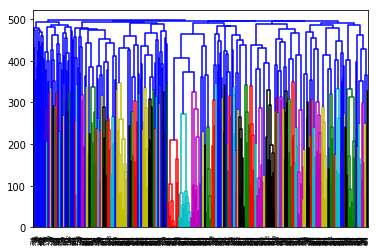

In [65]:

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    print(linkage_matrix)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(cluster)

In [66]:
#from scipy.cluster import hierarchy
Z = linkage(follow_matrix_scaled, method='ward', metric='euclidean')
Ztree=to_tree(Z)

def treewalk(node):
    retlist = []
    walked = False
    if node.left is not None:
        retlist.extend(treewalk(node.left))
        walked = True
    if node.right is not None:
        retlist.extend(treewalk(node.right))
        walked = True
    if walked:
        pass
    else:
        retlist.append(subsource_ids[node.id])
    return retlist
                       
ordered_list = treewalk(Ztree)
ordered_list = [subsource_dict[i] for i in ordered_list]
ordered_dict = {w: i for i, w in enumerate(ordered_list)}
ordered_list

['matt_levine',
 'RobinWigg',
 'johnauthers',
 'tracyalloway',
 'M_C_Klein',
 'izakaminska',
 'CardiffGarcia',
 'ritholtz',
 'ReformedBroker',
 'carney',
 'moorehn',
 'tomkeene',
 'pdacosta',
 'Convertbond',
 'paulkrugman',
 'ianbremmer',
 'Nouriel',
 'elerianm',
 'TheStalwart',
 'felixsalmon',
 'Neil_Irwin',
 'BCAppelbaum',
 'greg_ip',
 'davidmwessel',
 'Reddy',
 'NateSilver538',
 'JustinWolfers',
 'ObsoleteDogma',
 'DLeonhardt',
 'crampell',
 'ezraklein',
 'mattyglesias',
 'Austan_Goolsbee',
 'jbarro',
 'ryanavent',
 'tylercowen',
 'Noahpinion',
 'TimHarford',
 'delong',
 'MarkThoma',
 'rodrikdani',
 'B_Eichengreen',
 'R_Thaler',
 'MaxCRoser',
 'interfluidity',
 'rortybomb',
 'ModeledBehavior',
 'calculatedrisk',
 'conorsen',
 'grossdm',
 'AnnieLowrey',
 'DKThomp',
 'foxjust',
 'JohnCassidy',
 'NickTimiraos',
 'bencasselman',
 'planetmoney',
 'JimPethokoukis',
 'asymmetricinfo',
 'morningmoneyben',
 'lizzieohreally',
 'kairyssdal',
 'karaswisher',
 'MikeIsaac',
 'danprimack',
 'mims'

In [67]:
scatterplot(do_tsne(follow_matrix_scaled, perplexity=10), labels, clusters);


In [68]:
mydf = pd.DataFrame({'labels': labels, 'clusters': clusters})

In [69]:
mydf.loc[mydf["clusters"]==2]

,labels,clusters
6,TimHarford,2
7,calculatedrisk,2
18,ryanavent,2
19,rortybomb,2
21,delong,2
22,grossdm,2
23,rodrikdani,2
30,AnnieLowrey,2
31,MarkThoma,2
37,tylercowen,2


In [70]:
all3 = np.hstack((pca_coshares, pca_follows, topic_matrix[topic_cols]))

all_matrix = StandardScaler().fit_transform(all3)

num_topics=80
pca = PCA(n_components=num_topics).fit(all_matrix)
pca_all = pca.transform(all_matrix)
pca_all.shape

(500, 80)

{50: 4,
 52: 2,
 55: 2,
 56: 4,
 58: 4,
 61: 2,
 64: 4,
 66: 13,
 67: 2,
 69: 4,
 70: 14,
 72: 2,
 75: 1,
 76: 2,
 77: 4,
 78: 2,
 80: 4,
 81: 2,
 82: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 94: 2,
 95: 2,
 97: 8,
 98: 4,
 99: 2,
 100: 2,
 101: 6,
 103: 2,
 104: 2,
 105: 4,
 107: 2,
 109: 2,
 111: 4,
 112: 4,
 114: 2,
 117: 8,
 118: 4,
 120: 3,
 121: 5,
 124: 4,
 129: 2,
 130: 2,
 131: 2,
 132: 2,
 135: 15,
 139: 2,
 141: 4,
 143: 2,
 146: 2,
 147: 4,
 149: 2,
 150: 2,
 151: 4,
 152: 2,
 154: 2,
 155: 2,
 156: 4,
 158: 2,
 160: 10,
 164: 5,
 167: 4,
 168: 2,
 170: 8,
 174: 9,
 177: 4,
 179: 2,
 184: 2,
 185: 8,
 192: 2,
 193: 4,
 194: 4,
 199: 14,
 200: 8,
 201: 4,
 202: 4,
 203: 4,
 204: 2,
 205: 4,
 207: 4,
 208: 4,
 209: 14,
 210: 4,
 212: 13,
 214: 4,
 218: 14,
 219: 4,
 222: 8,
 223: 4,
 226: 10,
 227: 2,
 228: 2,
 231: 2,
 232: 10,
 233: 2,
 235: 8,
 236: 3,
 237: 2,
 240: 4,
 241: 4,
 243: 2,
 245: 9,
 246: 9,
 248: 1,
 249: 4,
 250: 2,
 251: 2,
 254: 9,
 256: 1,
 260: 2,
 261: 2,
 

In [82]:


cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(pca_all)
scatterplot(do_tsne(pca_all, perplexity=10), labels, clusters);


In [138]:
with open('tweepvecs.pkl', 'wb') as output:
    pickle.dump([pca_all, labels, clusters], output)


In [98]:
Z = linkage(pca_all, method='ward', metric='euclidean')
Ztree=to_tree(Z)
ordered_list = treewalk(Ztree)
ordered_list = [subsource_dict[i] for i in ordered_list]
ordered_dict = {w: i for i, w in enumerate(ordered_list)}
clusterdict = dict(zip(subsource_ids, clusters))
[(sname, clusterdict[subsource_reverse_dict[sname]]) for sname in ordered_list]


[('hedge_funds', 7),
 ('AlphaClone', 11),
 ('michaelsantoli', 11),
 ('SquawkStreet', 11),
 ('kaylatausche', 11),
 ('JBoorstin', 11),
 ('firstadopter', 11),
 ('jyarow', 11),
 ('SoberLook', 8),
 ('Chris_Whittall', 8),
 ('RolfeWinkler', 8),
 ('KateDavidson', 8),
 ('PreetaTweets', 8),
 ('rebeccaballhaus', 8),
 ('AaronLucchetti', 8),
 ('charlesforelle', 8),
 ('georgikantchev', 8),
 ('greg_ip', 8),
 ('jmackin2', 8),
 ('NickTimiraos', 8),
 ('jasonzweigwsj', 8),
 ('michaelsderby', 8),
 ('mileskimball', 8),
 ('NHendersonWSJ', 8),
 ('Spencerjakab', 8),
 ('GZuckerman', 8),
 ('Birdyword', 8),
 ('stephenfoley', 10),
 ('maxseddon', 10),
 ('Billbrowder', 10),
 ('chigrl', 10),
 ('humenm', 10),
 ('Ed_Crooks', 10),
 ('johngapper', 10),
 ('spignal', 10),
 ('lionelbarber', 10),
 ('ChrisGiles_', 10),
 ('FGoria', 10),
 ('katie_martin_FX', 10),
 ('TonyTassell', 10),
 ('RobinWigg', 10),
 ('MattGarrahan', 10),
 ('DavidKeo', 10),
 ('M_C_Klein', 10),
 ('FD', 10),
 ('TBraithwaite', 10),
 ('MalcolmMoore', 10),
 ('

In [77]:
# given a list, space around a circle
npoints = len(ordered_list)
coords = [(np.cos(x)+1, np.sin(x)+1) for x in np.linspace(0, 2*np.pi, npoints, endpoint=False)]
for i in range(npoints):
    print("%s (%0.8f, %0.8f)" % (ordered_list[i], coords[i][0], coords[i][1]))
    


hedge_funds (2.00000000, 1.00000000)
AlphaClone (1.99992104, 1.01256604)
michaelsantoli (1.99968419, 1.02513010)
SquawkStreet (1.99928947, 1.03769018)
kaylatausche (1.99873696, 1.05024432)
JBoorstin (1.99802673, 1.06279052)
firstadopter (1.99715890, 1.07532681)
jyarow (1.99613361, 1.08785120)
SoberLook (1.99495102, 1.10036171)
Chris_Whittall (1.99361131, 1.11285638)
RolfeWinkler (1.99211470, 1.12533323)
KateDavidson (1.99046143, 1.13779029)
PreetaTweets (1.98865174, 1.15022559)
rebeccaballhaus (1.98668594, 1.16263717)
AaronLucchetti (1.98456433, 1.17502306)
charlesforelle (1.98228725, 1.18738131)
georgikantchev (1.97985505, 1.19970998)
greg_ip (1.97726812, 1.21200711)
jmackin2 (1.97452687, 1.22427076)
NickTimiraos (1.97163173, 1.23649900)
jasonzweigwsj (1.96858316, 1.24868989)
michaelsderby (1.96538164, 1.26084151)
mileskimball (1.96202767, 1.27295194)
NHendersonWSJ (1.95852179, 1.28501926)
Spencerjakab (1.95486454, 1.29704158)
GZuckerman (1.95105652, 1.30901699)
Birdyword (1.94709830,

In [151]:
def get_N_HexCol(N=16):

    HSV_tuples = [(x*1.0/N, 0.75, 0.75) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x*255),colorsys.hsv_to_rgb(*rgb))
        hex_out.append("".join(map(lambda x: hex(x),rgb)))
    return [hx.replace("0x", "").upper() for hx in hex_out]

colordict = dict(zip([7,11,8,10,3,5,12,2,0,15,6,9,1,13,14,4], get_N_HexCol()))

nodedict = {}

node_id, node_label, node_x, node_y, node_color = [],[],[],[],[]

print("{")
print('  "nodes":  [')
for i in range(npoints):
    nodedict[ordered_list[i]] = i
    print('    {"id": "n%04d", "label": "%s", "x": %f, "y": %f, "color": "#%s"}%s' % (i,
                                                                                   ordered_list[i], 
                                                                                   coords[i][0], coords[i][1], 
                                                                                   colordict[clusterdict[subsource_reverse_dict[ordered_list[i]]]],
                                                                                   "," if i < npoints-1 else ""))
    node_id.append("n%04d" % i)
    node_label.append(ordered_list[i])
    node_x.append(coords[i][0])
    node_y.append(coords[i][1])
    node_color.append(colordict[clusterdict[subsource_reverse_dict[ordered_list[i]]]])
    
print("  ]")
print("}")

{
  "nodes":  [
    {"id": "n0000", "label": "hedge_funds", "x": 2.000000, "y": 1.000000, "color": "#BF2F2F"},
    {"id": "n0001", "label": "AlphaClone", "x": 1.999921, "y": 1.012566, "color": "#BF652F"},
    {"id": "n0002", "label": "michaelsantoli", "x": 1.999684, "y": 1.025130, "color": "#BF652F"},
    {"id": "n0003", "label": "SquawkStreet", "x": 1.999289, "y": 1.037690, "color": "#BF652F"},
    {"id": "n0004", "label": "kaylatausche", "x": 1.998737, "y": 1.050244, "color": "#BF652F"},
    {"id": "n0005", "label": "JBoorstin", "x": 1.998027, "y": 1.062791, "color": "#BF652F"},
    {"id": "n0006", "label": "firstadopter", "x": 1.997159, "y": 1.075327, "color": "#BF652F"},
    {"id": "n0007", "label": "jyarow", "x": 1.996134, "y": 1.087851, "color": "#BF652F"},
    {"id": "n0008", "label": "SoberLook", "x": 1.994951, "y": 1.100362, "color": "#BF9B2F"},
    {"id": "n0009", "label": "Chris_Whittall", "x": 1.993611, "y": 1.112856, "color": "#BF9B2F"},
    {"id": "n0010", "label": "Rolfe

In [149]:
node_df = pd.DataFrame({'id': node_id, 'label' : node_label, 'x': node_x, 'y': node_y, 'color': node_color})
node_df.head()

,id,label,x,y,color
0,n0000,hedge_funds,2.000000,1.000000,BF2F2F
1,n0001,AlphaClone,1.999921,1.012566,BF652F
2,n0002,michaelsantoli,1.999684,1.025130,BF652F
3,n0003,SquawkStreet,1.999289,1.037690,BF652F
4,n0004,kaylatausche,1.998737,1.050244,BF652F


In [111]:
sqlstr = "select source, target from tweep_edge order by source, target;"
edgeframe = pd.read_sql(sqlstr, engine)


0           50Pips
1           50Pips
2           50Pips
3           50Pips
4           50Pips
5           50Pips
6           50Pips
7           50Pips
8           50Pips
9           50Pips
10          50Pips
11          50Pips
12          50Pips
13          50Pips
14          50Pips
15          50Pips
16          50Pips
17          50Pips
18          50Pips
19          50Pips
20          50Pips
21          50Pips
22          50Pips
23          50Pips
24          50Pips
25          50Pips
26          50Pips
27          50Pips
28          50Pips
29          50Pips
           ...    
51285    _SidVerma
51286    _SidVerma
51287    _SidVerma
51288    _SidVerma
51289    _SidVerma
51290    _SidVerma
51291    _SidVerma
51292    _SidVerma
51293    _SidVerma
51294    _SidVerma
51295    _SidVerma
51296    _SidVerma
51297    _SidVerma
51298    _SidVerma
51299    _SidVerma
51300    _SidVerma
51301    _SidVerma
51302    _SidVerma
51303    _SidVerma
51304    _SidVerma
51305    _SidVerma
51306    _Si

In [181]:
edgelist, sourcelist, targetlist = [], [], []

with open("outfile.txt", "w") as f:
    f.write('  "edges":  [\n')
    count=0
    for source, target in zip(edgeframe["source"],edgeframe["target"]):
        f.write('  { "id": "e%06d", "source": "n%04d", "target": "n%04d"}%s\n' % (count, 
                                                                                  nodedict[source], 
                                                                                  nodedict[target],
                                                                                  "," if i < len(edgeframe)-1 else ""))
        edgelist.append("e%06d" % count)
        sourcelist.append("%s" % source)
        targetlist.append("%s" % target)
        count +=1
    f.write(']\n')

In [183]:
edge_df = pd.DataFrame({'id': edgelist, 'source': sourcelist, 'target': targetlist})
edge_df.head()
node_df.head()

,id,label,x,y,color
0,n0000,hedge_funds,2.000000,1.000000,BF2F2F
1,n0001,AlphaClone,1.999921,1.012566,BF652F
2,n0002,michaelsantoli,1.999684,1.025130,BF652F
3,n0003,SquawkStreet,1.999289,1.037690,BF652F
4,n0004,kaylatausche,1.998737,1.050244,BF652F


In [128]:
import colorsys

def get_N_HexCol(N=16):

    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x*255),colorsys.hsv_to_rgb(*rgb))
        hex_out.append("".join(map(lambda x: hex(x),rgb)))
    return [hx.replace("0x", "") for hx in hex_out]

dict(zip([7,11,8,10,3,5,12,2,0,15,6,9,1,13,14,4], get_N_HexCol()))


{7: '7f3f3f',
 11: '7f573f',
 8: '7f6f3f',
 10: '777f3f',
 3: '5f7f3f',
 5: '477f3f',
 12: '3f7f4f',
 2: '3f7f67',
 0: '3f7f7f',
 15: '3f677f',
 6: '3f4f7f',
 9: '473f7f',
 1: '5f3f7f',
 13: '773f7f',
 14: '7f3f6f',
 4: '7f3f57'}

In [185]:
import json
nodes_json_list = list(node_df.apply(lambda row: {"name": row['label'], "group": int(clusterdict[subsource_reverse_dict[row['label']]])}, axis=1))
edges_json_list = list(edge_df.apply(lambda row: {"source": nodedict[row['source']], "target": nodedict[row['target']], "value": 1}, axis=1))
json_prep = {"nodes":nodes_json_list, "links":edges_json_list}
json_dump = json.dumps(json_prep, indent=1, sort_keys=True)

with open('json.json', 'w') as filename_out:
    filename_out.write(json_dump)


In [ ]:
# dump colors based on clusters
# dump in initial position order
# label clusters
# force graph - connection strength?

# dump sizes based on pagerank, score, frequency
# switch between circle and force graph
# show edges when you click 
# show other popup details

In [164]:
clusterdict[subsource_reverse_dict['AlphaClone']]

11